In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from utils import *
from modules import *
from models import *
from torchvision import datasets, transforms

In [2]:
torch.cuda.empty_cache()

In [3]:
train_data = datasets.MNIST(root='/Users/Linsu Han/Documents/datasets/mnist/train.pt', train=True, download=True, transform=transforms.ToTensor())
val_data = datasets.MNIST(root='/Users/Linsu Han/Documents/datasets/mnist/val.pt', train=False, download=True, transform=transforms.ToTensor())

In [4]:
in_distribution = {5, 6, 7, 8, 9}
train_subset = get_subset(train_data, in_distribution)

In [5]:
print('train_data', len(train_data))
print('train_subset', len(train_subset))
print('val_data', len(val_data))

train_data 60000
train_subset 30596
val_data 10000


# Conv2d

`nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros')`

$$
\text{out}(N_i, C_{\text{out}_j}) = \text{bias}(C_{\text{out}_j}) + \sum_{k = 0}^{C_{\text{in}} - 1} \text{weight}(C_{\text{out}_j}, k) \star \text{input}(N_i, k)
$$

$$
H_{out} = \left\lfloor\frac{H_{in}  + 2 \times \text{padding}[0] - \text{dilation}[0]
                        \times (\text{kernel\_size}[0] - 1) - 1}{\text{stride}[0]} + 1\right\rfloor
$$

$$
W_{out} = \left\lfloor\frac{W_{in}  + 2 \times \text{padding}[1] - \text{dilation}[1]
        \times (\text{kernel\_size}[1] - 1) - 1}{\text{stride}[1]} + 1\right\rfloor
$$

# MaxPool2d

`nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)`

$$
H_{out} = \left\lfloor\frac{H_{in} + 2 * \text{padding[0]} - \text{dilation[0]} \times (\text{kernel\_size[0]} - 1) - 1}{\text{stride[0]}} + 1\right\rfloor
$$

$$
W_{out} = \left\lfloor\frac{W_{in} + 2 * \text{padding[1]} - \text{dilation[1]} \times (\text{kernel\_size[1]} - 1) - 1}{\text{stride[1]}} + 1\right\rfloor
$$

# ConvTranspose2d
`nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride=1, padding=0, output_padding=0, groups=1, bias=True, dilation=1, padding_mode='zeros')`

$$
              H_{out} = (H_{in} - 1) \times \text{stride}[0] - 2 \times \text{padding}[0] + \text{dilation}[0]
                        \times (\text{kernel\_size}[0] - 1) + \text{output\_padding}[0] + 1
$$

$$
              W_{out} = (W_{in} - 1) \times \text{stride}[1] - 2 \times \text{padding}[1] + \text{dilation}[1]
                        \times (\text{kernel\_size}[1] - 1) + \text{output\_padding}[1] + 1
$$

In [6]:
# Defaults
# nn.Sequential(*args)
# nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros')
# nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)
# nn.Linear(in_features, out_features, bias=True)
# nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride=1, padding=0, output_padding=0, groups=1, bias=True, dilation=1, padding_mode='zeros')

In [7]:
dim = 28
dim = conv_dim(dim, 3, 1, 0, 1)
print('conv', dim)
dim = conv_dim(dim, 3, 1, 0, 1)
print('conv', dim)
dim = conv_dim(dim, 2, 2, 0, 1)
print('conv', dim)
dim = deconv_dim(dim, 2, 2, 0, 0, 1)
print('deconv', dim)
dim = deconv_dim(dim, 3, 1, 0, 0, 1)
print('deconv', dim)
dim = deconv_dim(dim, 3, 1, 0, 0, 1)
print('deconv', dim)

conv 26
conv 24
conv 12
deconv 24
deconv 26
deconv 28


In [8]:
nn_module = ConvAutoencoder(16)
model = CAEModel(nn_module)

In [9]:
# # test forward method
# x, y = next(iter(train_loader))
# model(x.to('cuda')).shape

In [10]:
# model.train(train_subset, 16, verbose=True, batch_size=32, num_workers=2, shuffle=True)
# model.save('./mnist_cae.pth')

In [11]:
model.load('./mnist_cae.pth')

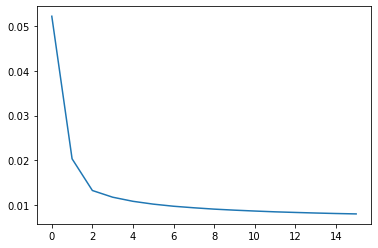

In [12]:
plt.plot(model.losses_epoch)

In [13]:
outputs = model.evaluate([val_data])

In [14]:
mse_dict = {k:[d['mse'] for d in v] for k, v in outputs.items()}

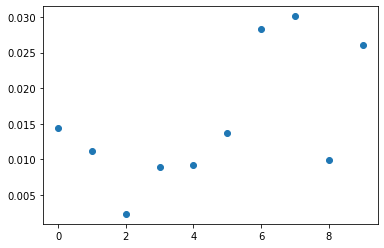

In [15]:
plt.scatter(range(10), [sum(v)/len(v) for v in mse_dict.values()])

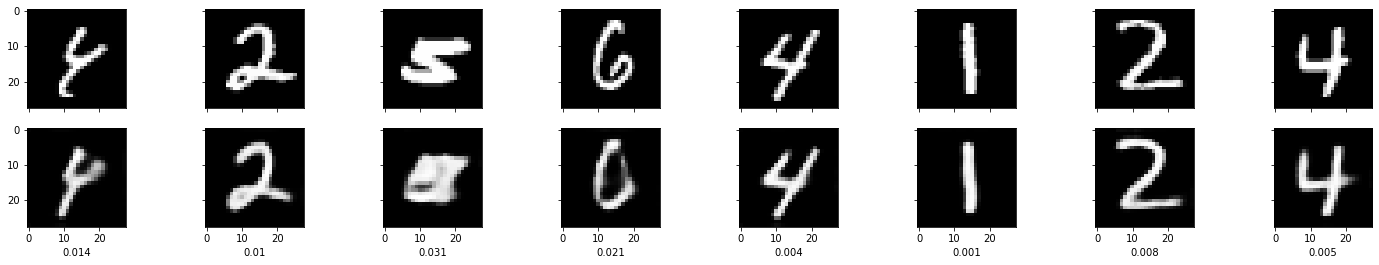

In [16]:
model.visualize(val_data, 8)

In [17]:
thresholds = np.arange(1e-3, 30e-3, 1e-3)
tpr, tnr = get_acc(mse_dict, thresholds, in_distribution)

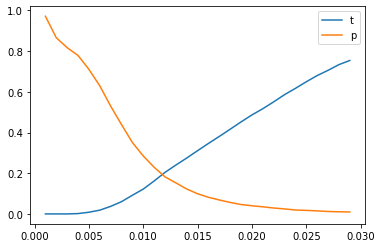

In [18]:
plt.plot(thresholds, tpr)
plt.plot(thresholds, tnr)
plt.legend(('tpr, tnr'))

Text(0, 0.5, 'True Positive Rate')

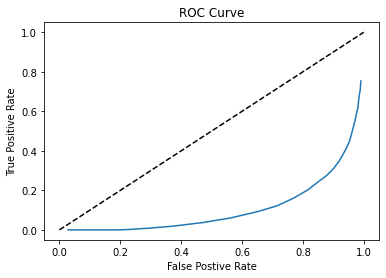

In [19]:
plt.plot(1-np.array(tnr), tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')